In [124]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Concatenate , Add, Dot, Activation
from tensorflow.keras.models import Model


from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

from tensorflow.python.client import device_lib
#tf.disable_v2_behavior()

#print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

print(tf.__version__ )

%matplotlib inline
%load_ext autoreload
%autoreload 2

Num GPUs Available:  1
2.9.1
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import decode_predictions

model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [126]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from scipy.ndimage import rotate
import imutils

#https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

def load_img(img_path,img_shape, preprocess=True, angle=0):
    
    img_rows=img_shape[0]
    img_cols=img_shape[1]
    #num_channel=img_shape[2]


    img = image.load_img(img_path , target_size=(img_rows, img_cols))    
    #img = rotate(img, angle, reshape=False)
    img = imutils.rotate(np.array(img), angle=angle)
    if preprocess:
        img = image.img_to_array(img) 
        img = np.expand_dims(img, axis=0)

        img =  preprocess_input(img)
        return img

    #data = np.array(data)
    #data = data.astype('float32')
    #data /= 255
    #labels=np.array(labels)
    #print('data shape',data.shape)
    #print('labels shape',labels.shape)
    return np.array(img)

In [127]:
def get_cnn_out(input, layer_num):
    get_layer_output = K.function([model.input], [l.output for l in model.layers][layer_num])
    layer_out = np.array(get_layer_output(input))
    return layer_out[0]

MovieWriter imagemagick unavailable; using Pillow instead.


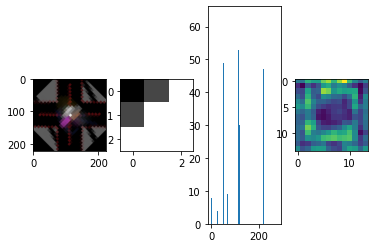

In [133]:

from tkinter import Y
from matplotlib.animation import FuncAnimation

import time
fig, ax = plt.subplots(1,4)
fig.set_tight_layout(False)

i=1

def update(i):
    label = 'timestep {0}'.format(i)

    img  = load_img('test_images/piano_zoom.png', angle=i*45, img_shape=(224,224),preprocess=False)
    img_in = load_img('test_images/piano_zoom.png', angle=i*45, img_shape=(224,224), preprocess=True)

    ax[0].imshow(img)

    ax[1].imshow(img_in[0, 111:114, 111:114, 1], cmap='gray')
    ax[2].clear()

    ax[2].bar(get_cnn_out(img_in, 1)[112, 112, :], np.arange(0, 64))
    ax[3].imshow(np.mean(get_cnn_out(img_in, 17), axis=-1))

    return ax



anim = FuncAnimation(fig, update, frames=np.arange(0, 8), interval=400)

anim.save('video_out/testMov.gif', dpi=80, writer='imagemagick')

In [129]:
np.arange(0, 64)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [130]:
get_cnn_out(img_in, 2)[124, 124,:]

array([   0.       ,   49.23472  ,  905.498    ,    0.       ,
        496.77084  ,  105.29036  ,   60.2603   ,    0.       ,
          0.       ,  265.61426  ,  109.28567  ,  271.31155  ,
        213.79807  ,   82.05754  ,    0.       ,    0.       ,
          0.       ,    0.       , 1682.6947   ,   43.34636  ,
          0.       ,  185.65361  ,    0.       ,   31.284386 ,
          0.       ,   16.587381 ,  175.87279  ,  460.91272  ,
          0.       ,    0.       ,    2.3190358,   49.962357 ,
          0.       ,   57.144936 ,   44.956093 ,   95.125145 ,
          0.       ,    0.       ,  200.25865  ,  249.72063  ,
          0.       ,   27.833738 ,  366.63788  ,  121.70761  ,
         96.39966  ,  293.51276  ,   74.44346  ,  222.75732  ,
         44.603504 ,    0.       ,  180.3177   ,  198.08762  ,
       1695.9413   ,  218.69707  ,  265.9626   ,   77.69427  ,
         76.29728  ,   79.64439  ,   98.46181  ,    0.       ,
          0.       ,  515.52155  ,   24.710924 ,   97.4

In [131]:
m = np.array([[-21, -23, -18],
              [-19, 0, -61.5], 
              [-25, -21, 62.5]])


In [132]:
-np.transpose(m)

array([[ 21. ,  19. ,  25. ],
       [ 23. ,  -0. ,  21. ],
       [ 18. ,  61.5, -62.5]])